In [19]:
import pandas as pd
import numpy as np
import sklearn

In [3]:
data = pd.read_csv('student-mat.csv', sep=';')

In [4]:
print(data.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [5]:
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]

In [6]:
print(data.head())

   G1  G2  G3  studytime  failures  absences
0   5   6   6          2         0         6
1   5   5   6          2         0         4
2   7   8  10          2         3        10
3  15  14  15          3         0         2
4   6  10  10          2         0         4


In [7]:
predict = "G3"

In [14]:
X = np.array(data.drop([predict], axis=1))
Y = np.array(data[predict])

In [17]:
print(X)


[[ 5  6  2  0  6]
 [ 5  5  2  0  4]
 [ 7  8  2  3 10]
 ...
 [10  8  1  3  3]
 [11 12  1  0  0]
 [ 8  9  1  0  5]]


In [26]:
import sklearn.model_selection
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.1)

In [28]:
import sklearn.linear_model
linear = sklearn.linear_model.LinearRegression()

linear.fit(X_train, Y_train)

LinearRegression()

In [34]:
acc = linear.score(X_test, Y_test)
print(acc)

0.9522397043492256


In [32]:
print(linear.coef_)
print(linear.intercept_)    

[ 0.15076367  0.98224621 -0.20137078 -0.29150108  0.03853007]
-1.491005836828597


In [35]:
predictions = linear.predict(X_test)

for x in range(len(predictions)):
    print(predictions[x], X_test[x], Y_test[x])


10.723481535641161 [11 11  2  0  4] 11
8.406854667360722 [10  9  3  0  4] 9
8.662189150997925 [8 9 1 0 8] 10
-0.4367177757964522 [11  0  3  0  0] 0
15.101400788564836 [15 15  2  0  0] 15
14.148964196945654 [15 14  3  0  6] 14
13.870533281469308 [15 14  4  0  4] 14
15.252164462222579 [16 15  2  0  0] 15
11.882944438075148 [13 12  3  0  6] 12
7.988744002262148 [7 9 1 1 2] 8
10.26783392350834 [ 9 11  2  0  0] 12
6.05685726861799 [ 7  6  2  0 26] 6
14.903386596656754 [14 15  3  0  4] 16
10.710411373265476 [11 11  1  1  6] 10
12.211982462961426 [12 12  1  0  8] 12
12.83538102969433 [13 13  2  0  0] 12
14.246821824605929 [14 14  1  0  2] 14
7.478572162152741 [8 8 2 0 8] 6
-1.81306148516365 [5 0 1 3 0] 0
12.05786219814409 [12 12  1  0  4] 13
13.374801956555006 [13 13  2  0 14] 14
12.81564118901478 [10 13  1  0  6] 13
15.959336343683335 [15 16  3  0  2] 18
9.539864546795974 [11 10  3  0  4] 11
10.928208909868431 [10 11  1  0  8] 10
18.1989030795551 [16 18  2  0  0] 18
9.436351391388571 [10 10 

In [40]:
import matplotlib.pyplot as plt
from matplotlib import style
import pickle
from tqdm import tqdm

In [37]:
with open("studentmodel.pickle", "wb") as f:
    pickle.dump(linear, f)

In [38]:
with open("studentmodel.pickle", "rb") as f:
    load_linear = pickle.load(f)

print(load_linear.score(X_test, Y_test))

0.9522397043492256


In [43]:
for _ in tqdm(range(1000000)):
    best = 0.9522397043492256

    linear = sklearn.linear_model.LinearRegression()
    linear.fit(X_train, Y_train)
    acc = linear.score(X_test, Y_test)

    if acc > best:
        best = acc
        with open("studentmodel.pickle", "wb") as f:
            pickle.dump(linear, f)
    
print(best)
    

100%|██████████| 1000000/1000000 [18:57<00:00, 879.50it/s] 

0.9522397043492256


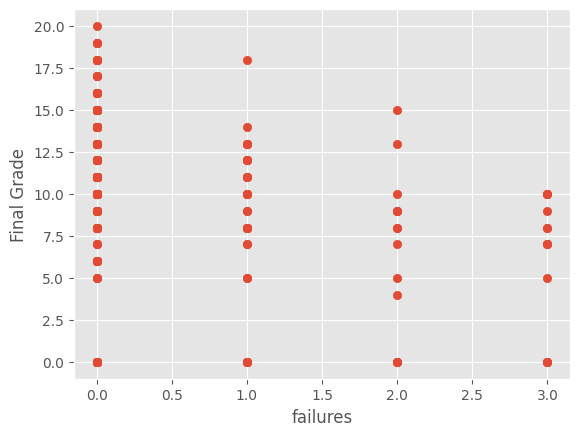

In [51]:
# plotting

p = 'failures'

style.use("ggplot")
plt.scatter(data[p], data["G3"])
plt.xlabel(p)
plt.ylabel("Final Grade")
plt.show()
